# 전국 커피지수 나타내기

In [34]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)
import folium
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [35]:
from glob import glob
# 파일 갯수 확인
len(glob('./과제data/소상공인*.csv'))

17

In [36]:
# 한꺼번에 하려니 메모리오류..
all_shop = glob('./과제data/소상공인*.csv')

In [37]:
# 강원도  부터
df = pd.read_csv(all_shop[0], sep='|')
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,20173815,황진이,NaN,Q,음식,Q09,유흥주점,Q09A10,룸살롱/단란주점,I56211,...,4213010100102030001000001,NaN,강원도 원주시 중앙로 61,220904,26429.0,NaN,1,NaN,127.952252,37.347773
1,20176916,용둔은영식당,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,4273031022105710012005956,NaN,강원도 횡성군 우천면 경강로 2730,225814,25244.0,NaN,1,NaN,128.059348,37.495197
2,20088927,아미식당,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,4272034021102240007032409,NaN,강원도 홍천군 서석면 풍암장터2길 49-13,250835,25166.0,NaN,1,NaN,128.187197,37.711402
3,20090406,산약초건강원,NaN,D,소매,D10,건강/미용식품,D10A07,건강원,G47216,...,4219010100100660002001227,NaN,강원도 태백시 황지로 112,235800,26014.0,NaN,1,NaN,128.992063,37.168758
4,20100551,왕벌식당,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,4280033026000000000011542,NaN,강원도 양구군 방산면 평화로 5432,255832,24501.0,NaN,1,NaN,127.955740,38.224635


In [38]:
df = df[['상호명', '도로명주소']]
df

,상호명,도로명주소
0,황진이,강원도 원주시 중앙로 61
1,용둔은영식당,강원도 횡성군 우천면 경강로 2730
2,아미식당,강원도 홍천군 서석면 풍암장터2길 49-13
3,산약초건강원,강원도 태백시 황지로 112
4,왕벌식당,강원도 양구군 방산면 평화로 5432
...,...,...
117769,일품양평해장국,강원도 화천군 간동면 파로호로 923
117770,이화떡방,강원도 원주시 중앙시장길 20-7
117771,티티팬,강원도 속초시 수복로 62
117772,덕암식당,강원도 정선군 임계면 송이재길 815


In [39]:
df[df['상호명'].str.contains('커피빈')]

,상호명,도로명주소
84047,커피빈,강원도 동해시 일출로 107
89575,커피빈,강원도 원주시 봉화로 1
106284,커피빈,강원도 춘천시 동내면 춘천순환로 61-15


In [40]:
df[df['상호명'].str.contains('스타벅스')]

,상호명,도로명주소
2643,스타벅스,강원도 원주시 금불1길 28-5
11726,스타벅스,강원도 홍천군 서면 한치골길 262
19518,스타벅스,강원도 고성군 토성면 미시령옛길 1153
21516,스타벅스,강원도 춘천시 서부대성로 243-1
29650,스타벅스,강원도 속초시 중앙로 123
34129,스타벅스,강원도 강릉시 경강로 2194-1
35248,스타벅스,강원도 춘천시 경춘로 2341
41966,스타벅스,강원도 고성군 간성읍 간성로 36
42439,스타벅스,강원도 원주시 문막읍 문막시장1길 32
42674,스타벅스,강원도 삼척시 진주로 30-49


In [41]:
df['ID'] = df.apply(lambda r: '고성(강원)' if r['도로명주소'].split()[1][:-1] == '고성' else  r['도로명주소'].split()[1][:-1]  , axis=1)

In [42]:
# 강원도 도시들의 커피지수 구하기 분모가 0이면 0으로 처리 
gangwon_list = []
for city in df['ID'].unique():
    if len(df[(df['상호명'].str.contains('이디야')) & (df['ID'] == city)]) + len(df[(df['상호명'].str.contains('빽다방')) & (df['ID'] == city)]) == 0 :
        gangwon_list.append((city, 0))
    else:    
        a = (len(df[(df['상호명'].str.contains('커피빈')) & (df['ID'] == city)])+len(df[(df['상호명'].str.contains('스타벅스')) & (df['ID'] == city)]))/ (len(df[(df['상호명'].str.contains('이디야')) & (df['ID'] == city)]) + len(df[(df['상호명'].str.contains('빽다방')) & (df['ID'] == city)]))
        gangwon_list.append((city, a))

In [43]:

gangwon_list

[('원주', 0.6875),
 ('횡성', 0.0),
 ('홍천', 0.5),
 ('태백', 1.0),
 ('양구', 0.0),
 ('속초', 0.5),
 ('인제', 0.3333333333333333),
 ('동해', 1.0),
 ('영월', 0),
 ('철원', 0.0),
 ('화천', 0.0),
 ('삼척', 0.3333333333333333),
 ('강릉', 0.3125),
 ('고성(강원)', 2.0),
 ('정선', 0.0),
 ('춘천', 0.3793103448275862),
 ('평창', 1.0),
 ('양양', 0.0)]

In [ ]:
df = pd.read_csv(all_shop[1], sep='|')

In [12]:
df = df[['상호명', '도로명주소']]
df.head()

,상호명,도로명주소
0,프리즐,경기도 남양주시 진접읍 봉현로 14
1,최씨네별난맛집,경기도 동두천시 광암로33번길 15
2,페리카나,경기도 성남시 중원구 마지로155번길 25-7
3,한우장다리식당,경기도 성남시 분당구 내정로119번길 20
4,우체국커피자동판매기,경기도 성남시 수정구 산성대로 297


In [13]:
df['ID'] = df.apply(lambda r: r['도로명주소'].split()[1][:-1]+' '+r['도로명주소'].split()[2][:-1] if r['도로명주소'].split()[1][:-1] in ['성남', '고양', '안산' ,'안양', '용인', '수원'] else  r['도로명주소'].split()[1][:-1]  , axis=1)

In [14]:
df['ID'].unique()

array(['남양주', '동두천', '성남 중원', '성남 분당', '성남 수정', '구리', '광명', '안양 만안',
       '안양 동안', '수원 권선', '평택', '안산 단원', '의정부', '수원 장안', '고양 덕양', '고양 일산동',
       '광주', '시흥', '고양 일산서', '안성', '안산 상록', '수원 영통', '양평', '여주', '김포',
       '파주', '양주', '화성', '수원 팔달', '부천', '용인 수지', '포천', '군포', '연천',
       '용인 기흥', '하남', '오산', '이천', '용인 처인', '의왕', '과천', '가평', '군산'],
      dtype=object)

In [15]:
gyounggi_list = []
for city in df['ID'].unique():
    if len(df[(df['상호명'].str.contains('이디야')) & (df['ID'] == city)]) + len(df[(df['상호명'].str.contains('빽다방')) & (df['ID'] == city)]) == 0 :
        gangwon_list.append((city, 0))
    else:    
        a = (len(df[(df['상호명'].str.contains('커피빈')) & (df['ID'] == city)])+len(df[(df['상호명'].str.contains('스타벅스')) & (df['ID'] == city)]))/ (len(df[(df['상호명'].str.contains('이디야')) & (df['ID'] == city)]) + len(df[(df['상호명'].str.contains('빽다방')) & (df['ID'] == city)]))
        gyounggi_list.append((city, a))

In [16]:
gyounggi_list

[('남양주', 0.2653061224489796),
 ('동두천', 2.0),
 ('성남 중원', 0.3333333333333333),
 ('성남 분당', 1.9090909090909092),
 ('성남 수정', 0.3333333333333333),
 ('구리', 0.26666666666666666),
 ('광명', 1.0),
 ('안양 만안', 0.35714285714285715),
 ('안양 동안', 0.9411764705882353),
 ('수원 권선', 0.5714285714285714),
 ('평택', 0.6111111111111112),
 ('안산 단원', 0.14814814814814814),
 ('의정부', 0.4230769230769231),
 ('수원 장안', 0.6),
 ('고양 덕양', 0.8695652173913043),
 ('고양 일산동', 1.3125),
 ('광주', 0.2777777777777778),
 ('시흥', 0.35714285714285715),
 ('고양 일산서', 1.75),
 ('안성', 1.0),
 ('안산 상록', 0.07692307692307693),
 ('수원 영통', 0.5833333333333334),
 ('양평', 0.6),
 ('여주', 0.75),
 ('김포', 0.5333333333333333),
 ('파주', 0.2962962962962963),
 ('양주', 0.4666666666666667),
 ('화성', 0.6666666666666666),
 ('수원 팔달', 1.0666666666666667),
 ('부천', 0.34146341463414637),
 ('용인 수지', 0.5714285714285714),
 ('포천', 0.5),
 ('군포', 0.375),
 ('연천', 1.0),
 ('용인 기흥', 0.5357142857142857),
 ('하남', 0.6111111111111112),
 ('오산', 0.6),
 ('이천', 1.375),
 ('용인 처인', 0.857142857142

In [17]:
# 경상남도
df = pd.read_csv(all_shop[2], sep='|')
df = df[['상호명', '도로명주소']]
df.head()

,상호명,도로명주소
0,장모님양념통닭,경상남도 함안군 가야읍 함안대로 541
1,코끼리술마시는노래방,경상남도 창원시 성산구 마디미로44번길 13
2,아림골식육식당,경상남도 거창군 거창읍 동동3길 34
3,허벌다이어트,경상남도 양산시 하북면 삼수새동네2길 41
4,엔돌핀노래주점,경상남도 창원시 마산합포구 어시장9길 35


In [18]:
df['ID'] = df.apply(lambda r: '고성(경남)' if r['도로명주소'].split()[1][:-1] == '고성' else r['도로명주소'].split()[1][:-1]+ ' ' + r['도로명주소'].split()[2][2:-1]  if r['도로명주소'].split()[2] in ['마산합포구','마산회원구'] else r['도로명주소'].split()[1][:-1]+' '+r['도로명주소'].split()[2][:-1] if r['도로명주소'].split()[1][:-1] in '창원'  else r['도로명주소'].split()[1][:-1]  , axis=1)

In [19]:
df['ID'].unique()

array(['함안', '창원 성산', '거창', '양산', '창원 합포', '의령', '밀양', '진주', '하동', '김해',
       '합천', '고성(경남)', '통영', '창원 의창', '창녕', '함양', '사천', '창원 회원', '남해',
       '창원 진해', '산청', '거제', '군포'], dtype=object)

In [20]:
gyoungnam_list = []
for city in df['ID'].unique():
    if len(df[(df['상호명'].str.contains('이디야')) & (df['ID'] == city)]) + len(df[(df['상호명'].str.contains('빽다방')) & (df['ID'] == city)]) == 0 :
        gangwon_list.append((city, 0))
    else:    
        a = (len(df[(df['상호명'].str.contains('커피빈')) & (df['ID'] == city)])+len(df[(df['상호명'].str.contains('스타벅스')) & (df['ID'] == city)]))/ (len(df[(df['상호명'].str.contains('이디야')) & (df['ID'] == city)]) + len(df[(df['상호명'].str.contains('빽다방')) & (df['ID'] == city)]))
        gyoungnam_list.append((city, a))

In [21]:
gyoungnam_list

[('함안', 2.0),
 ('창원 성산', 0.8461538461538461),
 ('거창', 0.0),
 ('양산', 0.4),
 ('창원 합포', 0.5714285714285714),
 ('밀양', 0.6),
 ('진주', 0.34782608695652173),
 ('김해', 0.4482758620689655),
 ('합천', 0.0),
 ('고성(경남)', 0.0),
 ('통영', 0.75),
 ('창원 의창', 0.6363636363636364),
 ('창녕', 0.5),
 ('함양', 1.0),
 ('사천', 0.6666666666666666),
 ('창원 회원', 1.0),
 ('남해', 0.0),
 ('창원 진해', 0.6),
 ('산청', 1.0),
 ('거제', 0.7142857142857143)]

In [22]:
# 경상북도
df = pd.read_csv(all_shop[3], sep='|')
df = df[['상호명', '도로명주소']]
df.head()

,상호명,도로명주소
0,광천강나루식당,경상북도 울진군 금강송면 불영계곡로 1264
1,허브다이어트클럽원호점,경상북도 구미시 고아읍 문장로22길 33
2,정화김밥,경상북도 경주시 충효중앙길 50-3
3,아!그집칼국수,경상북도 포항시 남구 인덕로 56
4,한양왕족발,경상북도 안동시 복주1길 41


In [23]:
df['ID'] = df.apply(lambda r: r['도로명주소'].split()[1][:-1]+' '+r['도로명주소'].split()[2][0:2] if r['도로명주소'].split()[1][:-1] in '포항' else  r['도로명주소'].split()[1][:-1]  , axis=1)

In [24]:
df[df['도로명주소'].str.contains('거제')]

,상호명,도로명주소,ID


In [25]:
df['ID'].unique()

array(['울진', '구미', '경주', '포항 남구', '안동', '포항 북구', '영주', '봉화', '상주', '예천',
       '군위', '울릉', '경산', '영천', '의성', '문경', '영덕', '청송', '김천', '성주', '청도',
       '고령', '칠곡', '영양'], dtype=object)

In [26]:
gyoungbuk_list = []
for city in df['ID'].unique():
    if len(df[(df['상호명'].str.contains('이디야')) & (df['ID'] == city)]) + len(df[(df['상호명'].str.contains('빽다방')) & (df['ID'] == city)]) == 0 :
        gangwon_list.append((city, 0))
    else:    
        a = (len(df[(df['상호명'].str.contains('커피빈')) & (df['ID'] == city)])+len(df[(df['상호명'].str.contains('스타벅스')) & (df['ID'] == city)]))/ (len(df[(df['상호명'].str.contains('이디야')) & (df['ID'] == city)]) + len(df[(df['상호명'].str.contains('빽다방')) & (df['ID'] == city)]))
        gyoungbuk_list.append((city, a))

In [27]:
gyoungbuk_list

[('울진', 0.25),
 ('구미', 0.5789473684210527),
 ('경주', 0.38461538461538464),
 ('포항 남구', 2.0),
 ('안동', 0.5),
 ('포항 북구', 0.6363636363636364),
 ('영주', 0.0),
 ('봉화', 0.0),
 ('상주', 0.5),
 ('예천', 0.0),
 ('경산', 0.6666666666666666),
 ('영천', 0.0),
 ('문경', 0.25),
 ('영덕', 0.5),
 ('청송', 0.0),
 ('김천', 0.6666666666666666),
 ('성주', 0.0),
 ('청도', 0.5),
 ('고령', 1.0),
 ('칠곡', 0.2)]

In [28]:
# 광주광역시
df = pd.read_csv(all_shop[4], sep='|')
df = df[['상호명', '도로명주소', '시도명']]
df.head()

,상호명,도로명주소,시도명
0,명진가마솥오곡밥,광주광역시 광산구 첨단중앙로170번길 17,광주광역시
1,카페홀더,광주광역시 서구 상무대로 760,광주광역시
2,체리음악홀,광주광역시 광산구 첨단중앙로152번길 57,광주광역시
3,동해바다,광주광역시 북구 경열로 215,광주광역시
4,멕시카나운암점,광주광역시 북구 북문대로169번길 20,광주광역시


In [29]:
df['ID'] = df.apply(lambda r:r['도로명주소'].split()[0][0:2] +' '+r['도로명주소'].split()[1][0:2] if len(r['도로명주소'].split()[1][:-1]) == 1 else r['도로명주소'].split()[0][0:2] +' '+  r['도로명주소'].split()[1][:-1] , axis=1)

In [30]:
df['ID'].unique()

array(['광주 광산', '광주 서구', '광주 북구', '광주 남구', '광주 동구'], dtype=object)

In [31]:
gwangju_list = []
for city in df['ID'].unique():
    if len(df[(df['상호명'].str.contains('이디야')) & (df['ID'] == city)]) + len(df[(df['상호명'].str.contains('빽다방')) & (df['ID'] == city)]) == 0 :
        gangwon_list.append((city, 0))
    else:    
        a = (len(df[(df['상호명'].str.contains('커피빈')) & (df['ID'] == city)])+len(df[(df['상호명'].str.contains('스타벅스')) & (df['ID'] == city)]))/ (len(df[(df['상호명'].str.contains('이디야')) & (df['ID'] == city)]) + len(df[(df['상호명'].str.contains('빽다방')) & (df['ID'] == city)]))
        gwangju_list.append((city, a))

In [32]:
gwangju_list

[('광주 광산', 0.8),
 ('광주 서구', 1.3333333333333333),
 ('광주 북구', 1.1666666666666667),
 ('광주 남구', 1.8571428571428572),
 ('광주 동구', 1.25)]

### 하나하나 할 순 없으니 한번에 묶어서하기

In [33]:
# 영어와 함께하니 컴퓨터의 문제인지..
tmp = []
for shop in all_shop:
    df = pd.read_csv(shop, sep='|')
    if df['시도명'][0] in ['서울특별시', '광주광역시', '대구광역시', '대전광역시', '부산광역시', '울산광역시', '인천광역시']:
        df['ID'] = df.apply(lambda r:r['도로명주소'].split()[0][0:2] +' '+r['도로명주소'].split()[1][0:2] if len(r['도로명주소'].split()[1][:-1]) == 1 else r['도로명주소'].split()[0][0:2] +' '+  r['도로명주소'].split()[1][:-1] , axis=1)
        for city in df['ID'].unique():
            if len(df[(df['상호명'].str.contains('이디야')) | (df['상호명'].str.contains('EDIYA')) & (df['ID'] == city)]) + len(df[(df['상호명'].str.contains('빽다방')) | (df[df['상호명'].str.contains('PAIK')]) & (df['ID'] == city)]) == 0 :
                tmp.append((city, 0))
            else:    
                 a = (len(df[(df['상호명'].str.contains('커피빈')) |(df[(df['상호명'].str.contains('COFFEEBEAN'))]) & (df['ID'] == city)])+len(df[(df['상호명'].str.contains('스타벅스')) |(df[(df['상호명'].str.contains('STARBUCKS'))]) & (df['ID'] == city)]))/ (len(df[(df['상호명'].str.contains('이디야')) | (df['상호명'].str.contains('EDIYA')) & (df['ID'] == city)]) + len(df[(df['상호명'].str.contains('빽다방')) | (df[df['상호명'].str.contains('PAIK')]) & (df['ID'] == city)]))
                 tmp.append((city, a))
    elif df['시도명'][0] not in ['서울특별시', '광주광역시', '대구광역시', '대전광역시', '부산광역시', '세종특별자치시', '울산광역시', '인천광역시', '경기도', '충청북도', '충청남도', '전라북도', '경상북도', '경상남도']:
        df['ID'] = df.apply(lambda r: '고성(강원)' if (r['도로명주소'].split()[1][:-1] == '고성') & (r['시도명'] == '강원도') else r['도로명주소'].split()[1][:-1]  , axis=1)
        for city in df['ID'].unique():
            if len(df[(df['상호명'].str.contains('이디야')) | (df['상호명'].str.contains('EDIYA')) & (df['ID'] == city)]) + len(df[(df['상호명'].str.contains('빽다방')) | (df[df['상호명'].str.contains('PAIK')]) & (df['ID'] == city)]) == 0 :
                tmp.append((city, 0))
            else:    
                 a = (len(df[(df['상호명'].str.contains('커피빈')) |(df[(df['상호명'].str.contains('COFFEEBEAN'))]) & (df['ID'] == city)])+len(df[(df['상호명'].str.contains('스타벅스')) |(df[(df['상호명'].str.contains('STARBUCKS'))]) & (df['ID'] == city)]))/ (len(df[(df['상호명'].str.contains('이디야')) | (df['상호명'].str.contains('EDIYA')) & (df['ID'] == city)]) + len(df[(df['상호명'].str.contains('빽다방')) | (df[df['상호명'].str.contains('PAIK')]) & (df['ID'] == city)]))
                 tmp.append((city, a))
    elif df['시도명'][0] in '세종특별자치시':
        df['ID'] = '세종'
        for city in df['ID'].unique():
            if len(df[(df['상호명'].str.contains('이디야')) | (df['상호명'].str.contains('EDIYA')) & (df['ID'] == city)]) + len(df[(df['상호명'].str.contains('빽다방')) | (df[df['상호명'].str.contains('PAIK')]) & (df['ID'] == city)]) == 0 :
                tmp.append((city, 0))
            else:    
                 a = (len(df[(df['상호명'].str.contains('커피빈')) |(df[(df['상호명'].str.contains('COFFEEBEAN'))]) & (df['ID'] == city)])+len(df[(df['상호명'].str.contains('스타벅스')) |(df[(df['상호명'].str.contains('STARBUCKS'))]) & (df['ID'] == city)]))/ (len(df[(df['상호명'].str.contains('이디야')) | (df['상호명'].str.contains('EDIYA')) & (df['ID'] == city)]) + len(df[(df['상호명'].str.contains('빽다방')) | (df[df['상호명'].str.contains('PAIK')]) & (df['ID'] == city)]))
                 tmp.append((city, a))
    elif df['시도명'][0] in '경기도':
        df['ID'] = df.apply(lambda r: r['도로명주소'].split()[1][:-1]+' '+r['도로명주소'].split()[2][:-1] if r['도로명주소'].split()[1][:-1] in ['성남', '고양', '안산' ,'안양', '용인', '수원'] else  r['도로명주소'].split()[1][:-1]  , axis=1)
        for city in df['ID'].unique():
            if len(df[(df['상호명'].str.contains('이디야')) | (df['상호명'].str.contains('EDIYA')) & (df['ID'] == city)]) + len(df[(df['상호명'].str.contains('빽다방')) | (df[df['상호명'].str.contains('PAIK')]) & (df['ID'] == city)]) == 0 :
                tmp.append((city, 0))
            else:    
                 a = (len(df[(df['상호명'].str.contains('커피빈')) |(df[(df['상호명'].str.contains('COFFEEBEAN'))]) & (df['ID'] == city)])+len(df[(df['상호명'].str.contains('스타벅스')) |(df[(df['상호명'].str.contains('STARBUCKS'))]) & (df['ID'] == city)]))/ (len(df[(df['상호명'].str.contains('이디야')) | (df['상호명'].str.contains('EDIYA')) & (df['ID'] == city)]) + len(df[(df['상호명'].str.contains('빽다방')) | (df[df['상호명'].str.contains('PAIK')]) & (df['ID'] == city)]))
                 tmp.append((city, a))
    elif df['시도명'][0] in '충청북도':
        df['ID'] = df.apply(lambda r: r['도로명주소'].split()[1][:-1]+' '+r['도로명주소'].split()[2][:-1] if r['도로명주소'].split()[1][:-1] in '청주' else  r['도로명주소'].split()[1][:-1]  , axis=1)
        for city in df['ID'].unique():
            if len(df[(df['상호명'].str.contains('이디야')) | (df['상호명'].str.contains('EDIYA')) & (df['ID'] == city)]) + len(df[(df['상호명'].str.contains('빽다방')) | (df[df['상호명'].str.contains('PAIK')]) & (df['ID'] == city)]) == 0 :
                tmp.append((city, 0))
            else:    
                 a = (len(df[(df['상호명'].str.contains('커피빈')) |(df[(df['상호명'].str.contains('COFFEEBEAN'))]) & (df['ID'] == city)])+len(df[(df['상호명'].str.contains('스타벅스')) |(df[(df['상호명'].str.contains('STARBUCKS'))]) & (df['ID'] == city)]))/ (len(df[(df['상호명'].str.contains('이디야')) | (df['상호명'].str.contains('EDIYA')) & (df['ID'] == city)]) + len(df[(df['상호명'].str.contains('빽다방')) | (df[df['상호명'].str.contains('PAIK')]) & (df['ID'] == city)]))
                 tmp.append((city, a))
    elif df['시도명'][0] in '충청남도':
        df['ID'] = df.apply(lambda r: r['도로명주소'].split()[1][:-1]+' '+r['도로명주소'].split()[2][:-1] if r['도로명주소'].split()[1][:-1] in '천안' else  r['도로명주소'].split()[1][:-1]  , axis=1)
        for city in df['ID'].unique():
            if len(df[(df['상호명'].str.contains('이디야')) | (df['상호명'].str.contains('EDIYA')) & (df['ID'] == city)]) + len(df[(df['상호명'].str.contains('빽다방')) | (df[df['상호명'].str.contains('PAIK')]) & (df['ID'] == city)]) == 0 :
                tmp.append((city, 0))
            else:    
                 a = (len(df[(df['상호명'].str.contains('커피빈')) |(df[(df['상호명'].str.contains('COFFEEBEAN'))]) & (df['ID'] == city)])+len(df[(df['상호명'].str.contains('스타벅스')) |(df[(df['상호명'].str.contains('STARBUCKS'))]) & (df['ID'] == city)]))/ (len(df[(df['상호명'].str.contains('이디야')) | (df['상호명'].str.contains('EDIYA')) & (df['ID'] == city)]) + len(df[(df['상호명'].str.contains('빽다방')) | (df[df['상호명'].str.contains('PAIK')]) & (df['ID'] == city)]))
                 tmp.append((city, a))
    elif df['시도명'][0] in '전라북도':
        df['ID'] = df.apply(lambda r: r['도로명주소'].split()[1][:-1]+' '+r['도로명주소'].split()[2][:-1] if r['도로명주소'].split()[1][:-1] in '전주' else  r['도로명주소'].split()[1][:-1]  , axis=1)
        for city in df['ID'].unique():
            if len(df[(df['상호명'].str.contains('이디야')) | (df['상호명'].str.contains('EDIYA')) & (df['ID'] == city)]) + len(df[(df['상호명'].str.contains('빽다방')) | (df[df['상호명'].str.contains('PAIK')]) & (df['ID'] == city)]) == 0 :
                tmp.append((city, 0))
            else:    
                 a = (len(df[(df['상호명'].str.contains('커피빈')) |(df[(df['상호명'].str.contains('COFFEEBEAN'))]) & (df['ID'] == city)])+len(df[(df['상호명'].str.contains('스타벅스')) |(df[(df['상호명'].str.contains('STARBUCKS'))]) & (df['ID'] == city)]))/ (len(df[(df['상호명'].str.contains('이디야')) | (df['상호명'].str.contains('EDIYA')) & (df['ID'] == city)]) + len(df[(df['상호명'].str.contains('빽다방')) | (df[df['상호명'].str.contains('PAIK')]) & (df['ID'] == city)]))
                 tmp.append((city, a))
    elif df['시도명'][0] in '경상북도':
        df['ID'] = df.apply(lambda r: r['도로명주소'].split()[1][:-1]+' '+r['도로명주소'].split()[2][0:2] if r['도로명주소'].split()[1][:-1] in '포항' else  r['도로명주소'].split()[1][:-1]  , axis=1)
        for city in df['ID'].unique():
            if len(df[(df['상호명'].str.contains('이디야')) | (df['상호명'].str.contains('EDIYA')) & (df['ID'] == city)]) + len(df[(df['상호명'].str.contains('빽다방')) | (df[df['상호명'].str.contains('PAIK')]) & (df['ID'] == city)]) == 0 :
                tmp.append((city, 0))
            else:    
                 a = (len(df[(df['상호명'].str.contains('커피빈')) |(df[(df['상호명'].str.contains('COFFEEBEAN'))]) & (df['ID'] == city)])+len(df[(df['상호명'].str.contains('스타벅스')) |(df[(df['상호명'].str.contains('STARBUCKS'))]) & (df['ID'] == city)]))/ (len(df[(df['상호명'].str.contains('이디야')) | (df['상호명'].str.contains('EDIYA')) & (df['ID'] == city)]) + len(df[(df['상호명'].str.contains('빽다방')) | (df[df['상호명'].str.contains('PAIK')]) & (df['ID'] == city)]))
                 tmp.append((city, a))
    elif df['시도명'][0] in '경상남도':
        df['ID'] = df.apply(lambda r: '고성(경남)' if r['도로명주소'].split()[1][:-1] == '고성' else r['도로명주소'].split()[1][:-1]+ ' ' + r['도로명주소'].split()[2][2:-1]  if r['도로명주소'].split()[2] in ['마산합포구','마산회원구'] else r['도로명주소'].split()[1][:-1]+' '+r['도로명주소'].split()[2][:-1] if r['도로명주소'].split()[1][:-1] in '창원'  else r['도로명주소'].split()[1][:-1]  , axis=1)
        for city in df['ID'].unique():
            if len(df[(df['상호명'].str.contains('이디야')) | (df['상호명'].str.contains('EDIYA')) & (df['ID'] == city)]) + len(df[(df['상호명'].str.contains('빽다방')) | (df[df['상호명'].str.contains('PAIK')]) & (df['ID'] == city)]) == 0 :
                tmp.append((city, 0))
            else:    
                 a = (len(df[(df['상호명'].str.contains('커피빈')) |(df[(df['상호명'].str.contains('COFFEEBEAN'))]) & (df['ID'] == city)])+len(df[(df['상호명'].str.contains('스타벅스')) |(df[(df['상호명'].str.contains('STARBUCKS'))]) & (df['ID'] == city)]))/ (len(df[(df['상호명'].str.contains('이디야')) | (df['상호명'].str.contains('EDIYA')) & (df['ID'] == city)]) + len(df[(df['상호명'].str.contains('빽다방')) | (df[df['상호명'].str.contains('PAIK')]) & (df['ID'] == city)]))
                 tmp.append((city, a))

ValueError: array is too big; `arr.size * arr.dtype.itemsize` is larger than the maximum possible size.

In [45]:
tmp = []
for shop in all_shop:
    df = pd.read_csv(shop, sep='|')
    if df['시도명'][0] in ['서울특별시', '광주광역시', '대구광역시', '대전광역시', '부산광역시', '울산광역시', '인천광역시']:
        df['ID'] = df.apply(lambda r:r['도로명주소'].split()[0][0:2] +' '+r['도로명주소'].split()[1][0:2] if len(r['도로명주소'].split()[1][:-1]) == 1 else r['도로명주소'].split()[0][0:2] +' '+  r['도로명주소'].split()[1][:-1] , axis=1)
        for city in df['ID'].unique():
            if len(df[(df['상호명'].str.contains('이디야')) & (df['ID'] == city)]) + len(df[(df['상호명'].str.contains('빽다방')) & (df['ID'] == city)]) == 0 :
                tmp.append((city, 0))
            else:    
                a = (len(df[(df['상호명'].str.contains('커피빈')) & (df['ID'] == city)])+len(df[(df['상호명'].str.contains('스타벅스')) & (df['ID'] == city)]))/ (len(df[(df['상호명'].str.contains('이디야')) & (df['ID'] == city)]) + len(df[(df['상호명'].str.contains('빽다방')) & (df['ID'] == city)]))
                tmp.append((city, a))
    elif df['시도명'][0] not in ['서울특별시', '광주광역시', '대구광역시', '대전광역시', '부산광역시', '세종특별자치시', '울산광역시', '인천광역시', '경기도', '충청북도', '충청남도', '전라북도', '경상북도', '경상남도']:
        df['ID'] = df.apply(lambda r: '고성(강원)' if (r['도로명주소'].split()[1][:-1] == '고성') & (r['시도명'] == '강원도') else r['도로명주소'].split()[1][:-1]  , axis=1)
        for city in df['ID'].unique():
            if len(df[(df['상호명'].str.contains('이디야')) & (df['ID'] == city)]) + len(df[(df['상호명'].str.contains('빽다방')) & (df['ID'] == city)]) == 0 :
                tmp.append((city, 0))
            else:    
                a = (len(df[(df['상호명'].str.contains('커피빈')) & (df['ID'] == city)])+len(df[(df['상호명'].str.contains('스타벅스')) & (df['ID'] == city)]))/ (len(df[(df['상호명'].str.contains('이디야')) & (df['ID'] == city)]) + len(df[(df['상호명'].str.contains('빽다방')) & (df['ID'] == city)]))
                tmp.append((city, a))
    elif df['시도명'][0] in '세종특별자치시':
        df['ID'] = '세종'
        for city in df['ID'].unique():
            if len(df[(df['상호명'].str.contains('이디야')) & (df['ID'] == city)]) + len(df[(df['상호명'].str.contains('빽다방')) & (df['ID'] == city)]) == 0 :
                tmp.append((city, 0))
            else:    
                a = (len(df[(df['상호명'].str.contains('커피빈')) & (df['ID'] == city)])+len(df[(df['상호명'].str.contains('스타벅스')) & (df['ID'] == city)]))/ (len(df[(df['상호명'].str.contains('이디야')) & (df['ID'] == city)]) + len(df[(df['상호명'].str.contains('빽다방')) & (df['ID'] == city)]))
                tmp.append((city, a))
    elif df['시도명'][0] in '경기도':
        df['ID'] = df.apply(lambda r: r['도로명주소'].split()[1][:-1]+' '+r['도로명주소'].split()[2][:-1] if r['도로명주소'].split()[1][:-1] in ['성남', '고양', '안산' ,'안양', '용인', '수원'] else  r['도로명주소'].split()[1][:-1]  , axis=1)
        for city in df['ID'].unique():
            if len(df[(df['상호명'].str.contains('이디야')) & (df['ID'] == city)]) + len(df[(df['상호명'].str.contains('빽다방')) & (df['ID'] == city)]) == 0 :
                tmp.append((city, 0))
            else:    
                a = (len(df[(df['상호명'].str.contains('커피빈')) & (df['ID'] == city)])+len(df[(df['상호명'].str.contains('스타벅스')) & (df['ID'] == city)]))/ (len(df[(df['상호명'].str.contains('이디야')) & (df['ID'] == city)]) + len(df[(df['상호명'].str.contains('빽다방')) & (df['ID'] == city)]))
                tmp.append((city, a))
    elif df['시도명'][0] in '충청북도':
        df['ID'] = df.apply(lambda r: r['도로명주소'].split()[1][:-1]+' '+r['도로명주소'].split()[2][:-1] if r['도로명주소'].split()[1][:-1] in '청주' else  r['도로명주소'].split()[1][:-1]  , axis=1)
        for city in df['ID'].unique():
            if len(df[(df['상호명'].str.contains('이디야')) & (df['ID'] == city)]) + len(df[(df['상호명'].str.contains('빽다방')) & (df['ID'] == city)]) == 0 :
                tmp.append((city, 0))
            else:    
                a = (len(df[(df['상호명'].str.contains('커피빈')) & (df['ID'] == city)])+len(df[(df['상호명'].str.contains('스타벅스')) & (df['ID'] == city)]))/ (len(df[(df['상호명'].str.contains('이디야')) & (df['ID'] == city)]) + len(df[(df['상호명'].str.contains('빽다방')) & (df['ID'] == city)]))
                tmp.append((city, a))
    elif df['시도명'][0] in '충청남도':
        df['ID'] = df.apply(lambda r: r['도로명주소'].split()[1][:-1]+' '+r['도로명주소'].split()[2][:-1] if r['도로명주소'].split()[1][:-1] in '천안' else  r['도로명주소'].split()[1][:-1]  , axis=1)
        for city in df['ID'].unique():
            if len(df[(df['상호명'].str.contains('이디야')) & (df['ID'] == city)]) + len(df[(df['상호명'].str.contains('빽다방')) & (df['ID'] == city)]) == 0 :
                tmp.append((city, 0))
            else:    
                a = (len(df[(df['상호명'].str.contains('커피빈')) & (df['ID'] == city)])+len(df[(df['상호명'].str.contains('스타벅스')) & (df['ID'] == city)]))/ (len(df[(df['상호명'].str.contains('이디야')) & (df['ID'] == city)]) + len(df[(df['상호명'].str.contains('빽다방')) & (df['ID'] == city)]))
                tmp.append((city, a))
    elif df['시도명'][0] in '전라북도':
        df['ID'] = df.apply(lambda r: r['도로명주소'].split()[1][:-1]+' '+r['도로명주소'].split()[2][:-1] if r['도로명주소'].split()[1][:-1] in '전주' else  r['도로명주소'].split()[1][:-1]  , axis=1)
        for city in df['ID'].unique():
            if len(df[(df['상호명'].str.contains('이디야')) & (df['ID'] == city)]) + len(df[(df['상호명'].str.contains('빽다방')) & (df['ID'] == city)]) == 0 :
                tmp.append((city, 0))
            else:    
                a = (len(df[(df['상호명'].str.contains('커피빈')) & (df['ID'] == city)])+len(df[(df['상호명'].str.contains('스타벅스')) & (df['ID'] == city)]))/ (len(df[(df['상호명'].str.contains('이디야')) & (df['ID'] == city)]) + len(df[(df['상호명'].str.contains('빽다방')) & (df['ID'] == city)]))
                tmp.append((city, a))
    elif df['시도명'][0] in '경상북도':
        df['ID'] = df.apply(lambda r: r['도로명주소'].split()[1][:-1]+' '+r['도로명주소'].split()[2][0:2] if r['도로명주소'].split()[1][:-1] in '포항' else  r['도로명주소'].split()[1][:-1]  , axis=1)
        for city in df['ID'].unique():
            if len(df[(df['상호명'].str.contains('이디야')) & (df['ID'] == city)]) + len(df[(df['상호명'].str.contains('빽다방')) & (df['ID'] == city)]) == 0 :
                tmp.append((city, 0))
            else:    
                a = (len(df[(df['상호명'].str.contains('커피빈')) & (df['ID'] == city)])+len(df[(df['상호명'].str.contains('스타벅스')) & (df['ID'] == city)]))/ (len(df[(df['상호명'].str.contains('이디야')) & (df['ID'] == city)]) + len(df[(df['상호명'].str.contains('빽다방')) & (df['ID'] == city)]))
                tmp.append((city, a))
    elif df['시도명'][0] in '경상남도':
        df['ID'] = df.apply(lambda r: '고성(경남)' if r['도로명주소'].split()[1][:-1] == '고성' else r['도로명주소'].split()[1][:-1]+ ' ' + r['도로명주소'].split()[2][2:-1]  if r['도로명주소'].split()[2] in ['마산합포구','마산회원구'] else r['도로명주소'].split()[1][:-1]+' '+r['도로명주소'].split()[2][:-1] if r['도로명주소'].split()[1][:-1] in '창원'  else r['도로명주소'].split()[1][:-1]  , axis=1)
        for city in df['ID'].unique():
            if len(df[(df['상호명'].str.contains('이디야')) & (df['ID'] == city)]) + len(df[(df['상호명'].str.contains('빽다방')) & (df['ID'] == city)]) == 0 :
                tmp.append((city, 0))
            else:    
                a = (len(df[(df['상호명'].str.contains('커피빈')) & (df['ID'] == city)])+len(df[(df['상호명'].str.contains('스타벅스')) & (df['ID'] == city)]))/ (len(df[(df['상호명'].str.contains('이디야')) & (df['ID'] == city)]) + len(df[(df['상호명'].str.contains('빽다방')) & (df['ID'] == city)]))
                tmp.append((city, a))

In [46]:
c_p = pd.DataFrame(tmp)

In [47]:
# 잘나옴ㅎ
tmp

[('원주', 0.6875),
 ('횡성', 0.0),
 ('홍천', 0.5),
 ('태백', 1.0),
 ('양구', 0.0),
 ('속초', 0.5),
 ('인제', 0.3333333333333333),
 ('동해', 1.0),
 ('영월', 0),
 ('철원', 0.0),
 ('화천', 0.0),
 ('삼척', 0.3333333333333333),
 ('강릉', 0.3125),
 ('고성(강원)', 2.0),
 ('정선', 0.0),
 ('춘천', 0.3793103448275862),
 ('평창', 1.0),
 ('양양', 0.0),
 ('남양주', 0.2653061224489796),
 ('동두천', 2.0),
 ('성남 중원', 0.3333333333333333),
 ('성남 분당', 1.9090909090909092),
 ('성남 수정', 0.3333333333333333),
 ('구리', 0.26666666666666666),
 ('광명', 1.0),
 ('안양 만안', 0.35714285714285715),
 ('안양 동안', 0.9411764705882353),
 ('수원 권선', 0.5714285714285714),
 ('평택', 0.6111111111111112),
 ('안산 단원', 0.14814814814814814),
 ('의정부', 0.4230769230769231),
 ('수원 장안', 0.6),
 ('고양 덕양', 0.8695652173913043),
 ('고양 일산동', 1.3125),
 ('광주', 0.2777777777777778),
 ('시흥', 0.35714285714285715),
 ('고양 일산서', 1.75),
 ('안성', 1.0),
 ('안산 상록', 0.07692307692307693),
 ('수원 영통', 0.5833333333333334),
 ('양평', 0.6),
 ('여주', 0.75),
 ('김포', 0.5333333333333333),
 ('파주', 0.2962962962962963),
 ('양주',

In [48]:
c_p.rename({0: 'ID', 1 : '커피지수'},inplace=True,axis=1)
c_p

,ID,커피지수
0,원주,0.687500
1,횡성,0.000000
2,홍천,0.500000
3,태백,1.000000
4,양구,0.000000
...,...,...
248,청주 흥덕,0.611111
249,증평,0.333333
250,제천,0.600000
251,보은,0.500000


### 카토그램으로 표기하기

In [49]:
draw_korea_raw = pd.read_excel('./과제data/draw_korea_raw(수정).xlsx')
draw_korea_raw_stacked = pd.DataFrame(draw_korea_raw.stack())
draw_korea_raw_stacked.reset_index(inplace=True)
draw_korea_raw_stacked

,level_0,level_1,0
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
...,...,...,...
245,24,2,장흥
246,24,3,보성
247,25,2,완도
248,25,5,제주


In [50]:
draw_korea_raw_stacked.rename(columns={'level_0' : 'y', 'level_1' : 'x', 0: 'ID'}, inplace=True)
draw_korea_raw_stacked

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
...,...,...,...
245,24,2,장흥
246,24,3,보성
247,25,2,완도
248,25,5,제주


In [51]:
draw_korea = draw_korea_raw_stacked

In [52]:
draw_korea.loc[draw_korea['ID'] == '인천 남구', 'ID'] = '인천 미추홀'

In [53]:
draw_korea[draw_korea['ID'] == '인천 미추홀']

,y,x,ID
83,9,2,인천 미추홀


In [54]:
BORDER_LINES = [
    [(5, 1), (5,2), (6,2), (6,3), (11,3), (11,0)], # 인천
    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9), 
     (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], # 서울
    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7), 
     (12,7), (12,6), (11,6), (11,5), (12, 5), (12,4), 
     (11,4), (11,3)], # 경기도
    [(8,10), (8,11), (6,11), (6,12)], # 강원도
    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), 
     (15,4), (16,4), (16,2)], # 충청북도
    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), 
     (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전라북도
    [(13,5), (13,6), (16,6)], # 대전시
    [(13,5), (14,5)], #세종시
    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
    [(20,5), (21,5), (21,6), (23,6)], #전라남도
    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충청북도
    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경상북도
    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
    [(16,11), (16,13)], #울산
#     [(9,14), (9,15)], 
    [(27,5), (27,6), (25,6)],
]

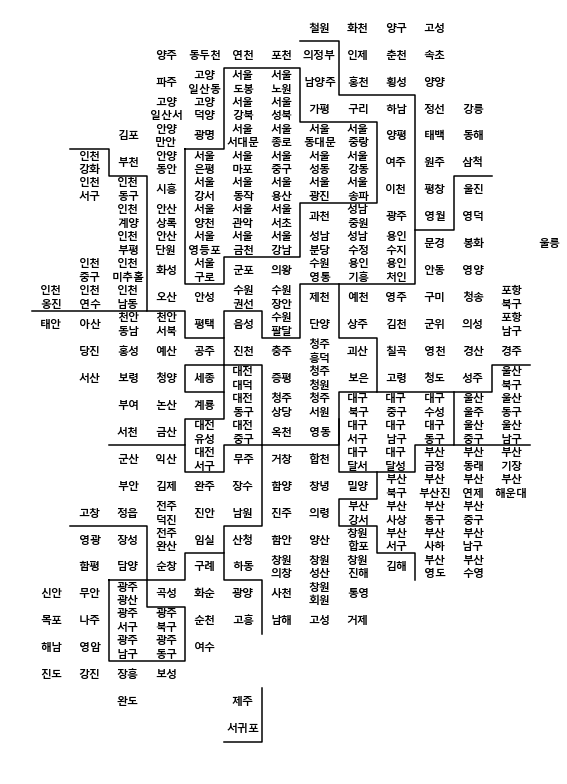

In [55]:
plt.figure(figsize=(8, 11))

for idx, row in draw_korea.iterrows():

    # 광역시는 구이름이 겹치는 경우가 많아서 시단위 이름과 함께 표시
    if len(row['ID'].split()) == 2:
        dispname = f'''{row["ID"].split()[0]}\n{row["ID"].split()[1]}'''
    elif row['ID'][:2] == '고성':
        dispname = '고성'
    else:
        dispname = row['ID']
    # 서대문구와 같이 이름이 3자 이상은 글자크기를 작게
    if len(dispname.splitlines()[-1]) > 3 :
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11,1.2

    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                fontsize=fontsize, ha='center', va='center', 
                linespacing=linespacing)
for path in BORDER_LINES:
    ys,xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=1.5)

plt.gca().invert_yaxis()

plt.axis('off')

plt.tight_layout()
plt.show()

In [56]:
tmp_list = list(set(c_p['ID'].unique()) - set(draw_korea['ID'].unique()))

In [57]:
# 아직 미추홀구로 바꾸기 전 데이터 였나보다.
tmp_list

['인천 남구']

In [58]:
c_p[c_p['ID'] == '인천 남구']

,ID,커피지수
183,인천 남구,0.0


In [59]:
# ??
c_p[c_p['ID'] == '인천 미추홀']

,ID,커피지수
173,인천 미추홀,0.5


In [60]:
# 어차피 0이니 필요없는 데이터로 간주해서 삭제
c_p.drop([183],inplace=True)

In [61]:
c_p = pd.merge(c_p, draw_korea, how='left', on=['ID'])
c_p.head()

,ID,커피지수,y,x
0,원주,0.6875,5,10
1,횡성,0.0000,2,9
2,홍천,0.5000,2,8
3,태백,1.0000,4,10
4,양구,0.0000,0,9


In [62]:
def drawKorea(targerData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = (max(blockedMap[targerData]) - min(blockedMap[targerData]))*0.25 + min(blockedMap[targerData])

    datalabel = targerData

    vmin = min(blockedMap[targerData])
    vmax = max(blockedMap[targerData])

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targerData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)

    plt.figure(figsize=(9,11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor = '#aaaaaa', linewidth=0.5)

    for idx, row in blockedMap.iterrows():

        # 광역시는 구이름이 겹치는 경우가 많아서 시단위 이름과 함께 표시
        if len(row['ID'].split()) == 2:
            dispname = f'''{row["ID"].split()[0]}\n{row["ID"].split()[1]}'''
        elif row['ID'][:2] == '고성':
            dispname = '고성'
        else:
            dispname = row['ID']
        # 서대문구와 같이 이름이 3자 이상은 글자크기를 작게
        if len(dispname.splitlines()[-1]) > 3 :
            fontsize, linespacing = 9.5, 1.5
        else:
            fontsize, linespacing = 11,1.2

        annocolor = 'white' if row[targerData] > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    for path in BORDER_LINES:
        ys,xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=1.5)

    plt.gca().invert_yaxis()

    plt.axis('off')

    plt.tight_layout()
    plt.show()

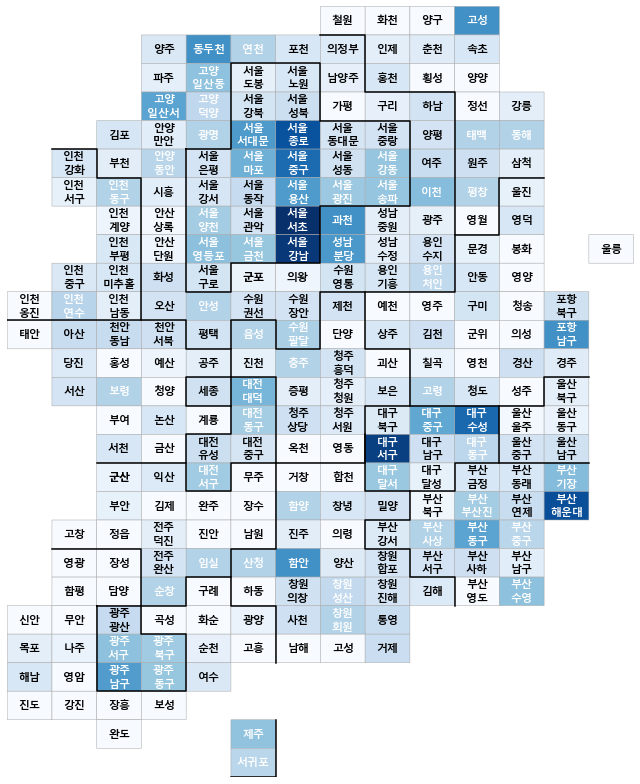

In [63]:
drawKorea('커피지수',c_p, 'Blues')

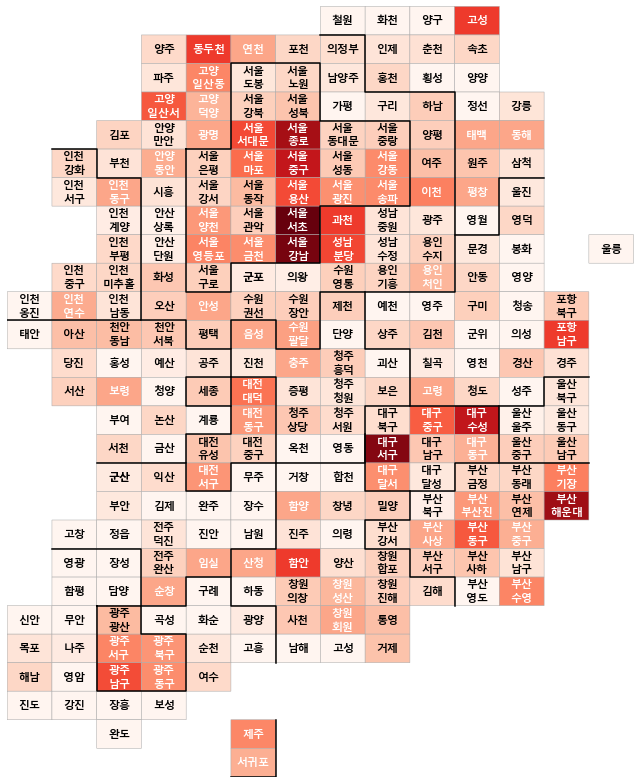

In [64]:
drawKorea('커피지수', c_p, 'Reds')

In [65]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = 20.

    datalabel = targetData

    tmp_max = max([ np.abs(min(blockedMap[targetData])), 
                                  np.abs(max(blockedMap[targetData]))])
    vmin, vmax = -tmp_max, tmp_max

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)


    for idx, row in blockedMap.iterrows():
       
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

      
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if np.abs(row[targetData]) > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

### 지도에 커피지수 표기하기

In [66]:
c_p_folium = c_p.set_index('ID')
c_p_folium.head()

,커피지수,y,x
ID,,,
원주,0.6875,5,10
횡성,0.0000,2,9
홍천,0.5000,2,8
태백,1.0000,4,10
양구,0.0000,0,9


In [67]:
geo_path = './과제data/skorea_municipalities_geo_simple.json'
geo_data = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[36.2002, 127.054], zoom_start=7)
map.choropleth(geo_data = geo_data,  
               data = c_p_folium['커피지수'],
               columns= [c_p_folium.index, c_p_folium['커피지수']],
               fill_color= 'YlGnBu',
               key_on='feature.id'
)
map

In [68]:
c_p.to_csv("./results/c_p.csv", encoding='utf-8', sep=',')